In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# Agglomerative Clustering

O algoritmo de clusterização aglomerativa, também conhecido como Agglomerative Clustering, é uma técnica de aprendizado de máquina não supervisionado que agrupa os dados em uma hierarquia de clusters "bottom-up" (começa com cada ponto sendo seu próprio cluster e, em seguida, mescla iterativamente os clusters). O Agglomerative Clustering é uma abordagem genérica que permite escolher diferentes critérios de mesclagem para formar os clusters. Existem quatro critérios de mesclagem comuns utilizados nessa abordagem: ligação única (single linkage), ligação completa (complete linkage), ligação média (average linkage) e Ward.

<ul>
<li>Na <b>ligação única</b>, a distância entre dois clusters é definida como a menor distância entre qualquer par de pontos pertencentes a cada cluster. Isso significa que os dois clusters são mesclados com base nos dois pontos mais próximos entre eles.</li>

<li>Na <b>ligação completa</b>, a distância entre dois clusters é definida como a maior distância entre qualquer par de pontos pertencentes a cada cluster. Isso significa que os dois clusters são mesclados com base nos dois pontos mais distantes entre eles.</li>

<li>Na <b>ligação média</b>, a distância entre dois clusters é definida como a média de todas as distâncias entre os pontos pertencentes a cada cluster. Isso significa que os dois clusters são mesclados com base na média das distâncias entre todos os pontos de ambos os clusters.</li>

<li>A <b>ligação Ward</b> foca na minimização da variância dentro dos clusters. Ele calcula a soma das diferenças quadráticas entre cada ponto e a média do cluster a que pertence, para todos os clusters que seriam formados pela mesclagem. A mesclagem que resulta na menor soma de diferenças quadráticas é escolhida. Isso tende a formar clusters compactos e homogêneos.</li>
</ul>
Passo a passo de como o algoritmo de clusterização aglomerativa funciona:

**1. Inicialização**: Inicialmente, cada ponto de dado é considerado como um cluster individual.

**2. Cálculo da matriz de distância**: Em seguida, é calculada uma matriz de distância que contém as distâncias entre todos os pares de pontos de dados no conjunto de dados. A distância pode ser medida usando uma métrica como a distância euclidiana ou uma função de similaridade.

**3. Mesclagem dos Clusters**: O algoritmo começa mesclando os dois clusters mais próximos, ou seja, aqueles que têm a menor distância entre eles. A distância entre dois clusters é definida como a soma dos quadrados das diferenças entre todos os pontos dos clusters e o centro do novo cluster mesclado.

**4. Atualização da Matriz de Distância**: Após mesclar dois clusters, a matriz de distância é atualizada para refletir a nova distância entre os clusters mesclados e os clusters restantes. O critério de ligação de Ward considera a variação dos pontos dentro dos clusters e entre os clusters mesclados para calcular a distância.

**5. Repetição**: Os passos 3 e 4 são repetidos iterativamente até que todos os pontos estejam em um único cluster. Isso forma uma hierarquia de clusters, representada por um dendrograma.
Dendrograma e Corte: O dendrograma representa a hierarquia de clusters em forma de árvore. Para determinar o número de clusters desejado, pode-se fazer um "corte" no dendrograma em um determinado nível, que corresponderá ao número de clusters desejado.

Cada critério de linkage tem suas próprias características e é mais adequado para diferentes tipos de dados e estruturas de cluster. Não há um critério de ligação universalmente superior, e a escolha depende do contexto da análise e dos objetivos específicos. Muitas vezes, a experimentação com diferentes critérios é necessária para determinar qual critério se ajusta melhor aos seus dados e ao resultado desejado.


# Data

In [2]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

<h1>Redução de dimensionalidade</h1>

In [3]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

<h1>Ligação Única</h1>

In [4]:
from sklearn.cluster import AgglomerativeClustering

ac_labels_syn_ctrl = AgglomerativeClustering(n_clusters = 6, linkage='single').fit_predict(X_syn_ctrl)
ac_labels_wine = AgglomerativeClustering(n_clusters = 3, linkage='single').fit_predict(X_wine)
ac_labels_iris = AgglomerativeClustering(n_clusters = 3, linkage='single').fit_predict(X_iris)

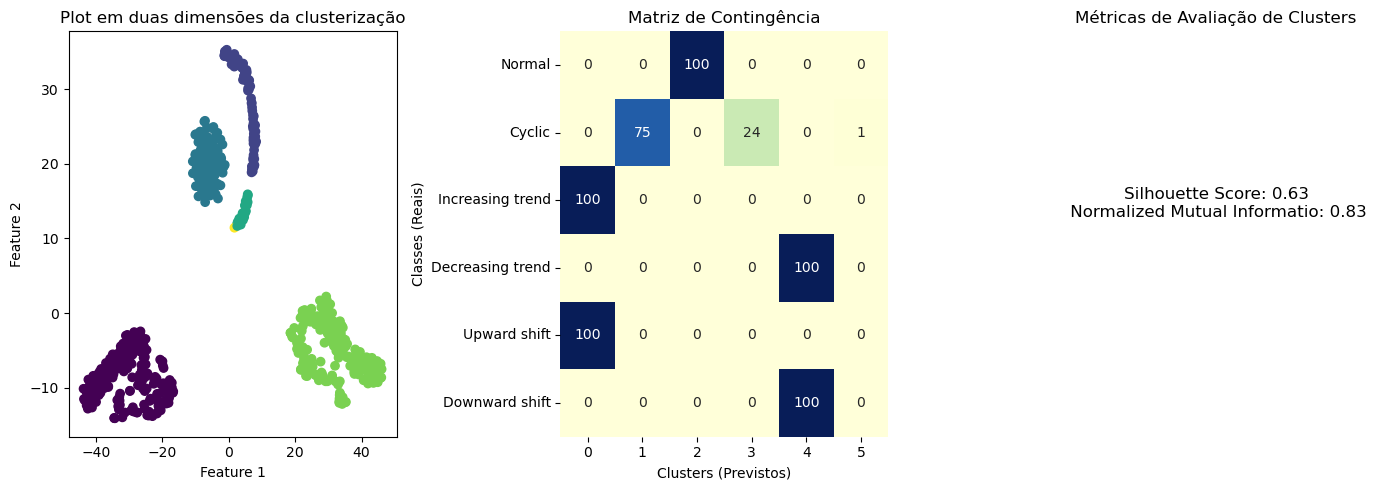

In [5]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, ac_labels_syn_ctrl, syn_ctrl_target_names)

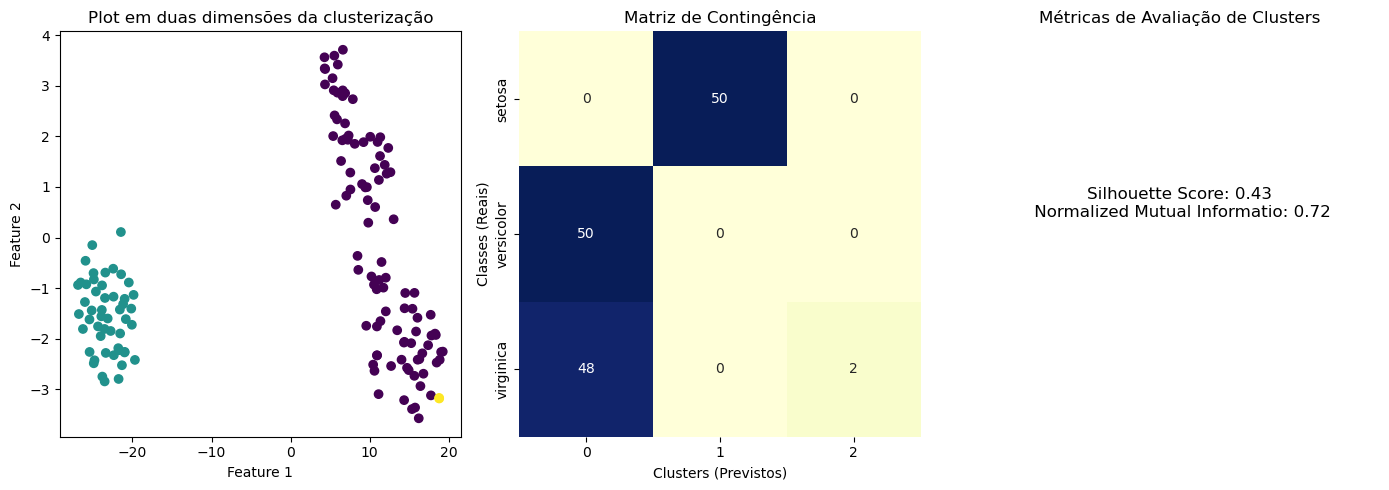

In [6]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, ac_labels_iris, iris_target_names)

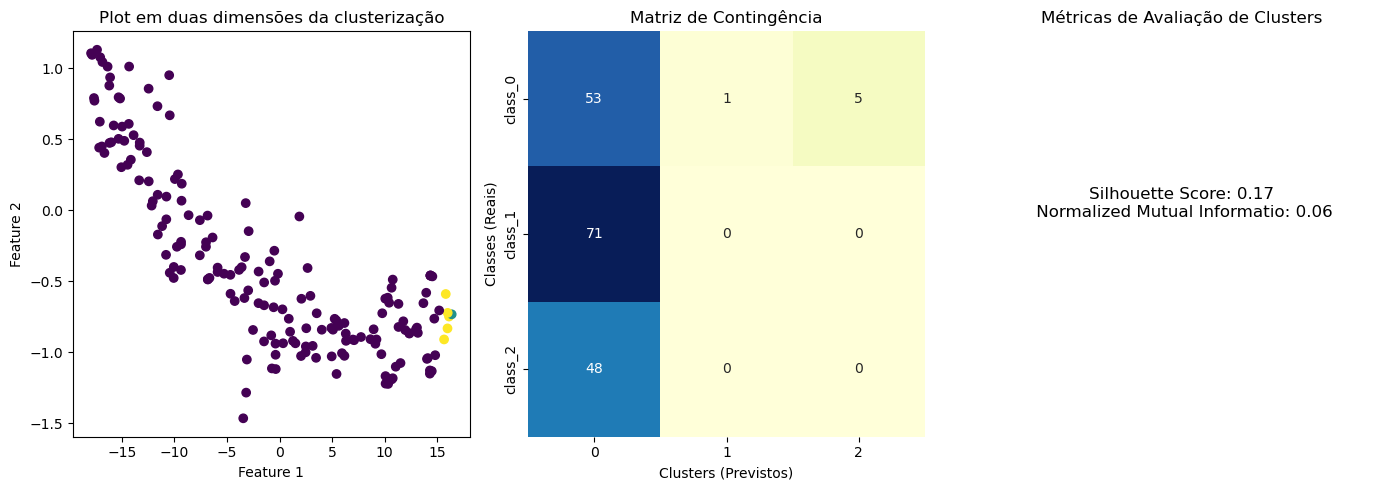

In [7]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, ac_labels_wine, wine_target_names)

<h1>Ligação Completa</h1>

In [8]:
ac_labels_syn_ctrl = AgglomerativeClustering(n_clusters = 6, linkage='complete').fit_predict(X_syn_ctrl)
ac_labels_wine = AgglomerativeClustering(n_clusters = 3, linkage='complete').fit_predict(X_wine)
ac_labels_iris = AgglomerativeClustering(n_clusters = 3, linkage='complete').fit_predict(X_iris)

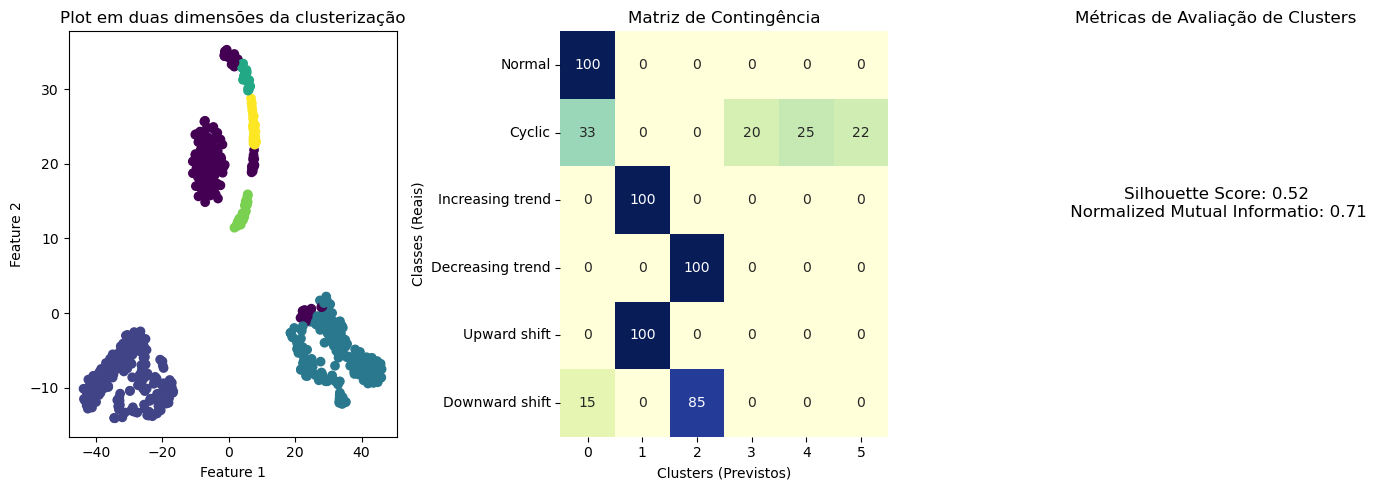

In [9]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, ac_labels_syn_ctrl, syn_ctrl_target_names)

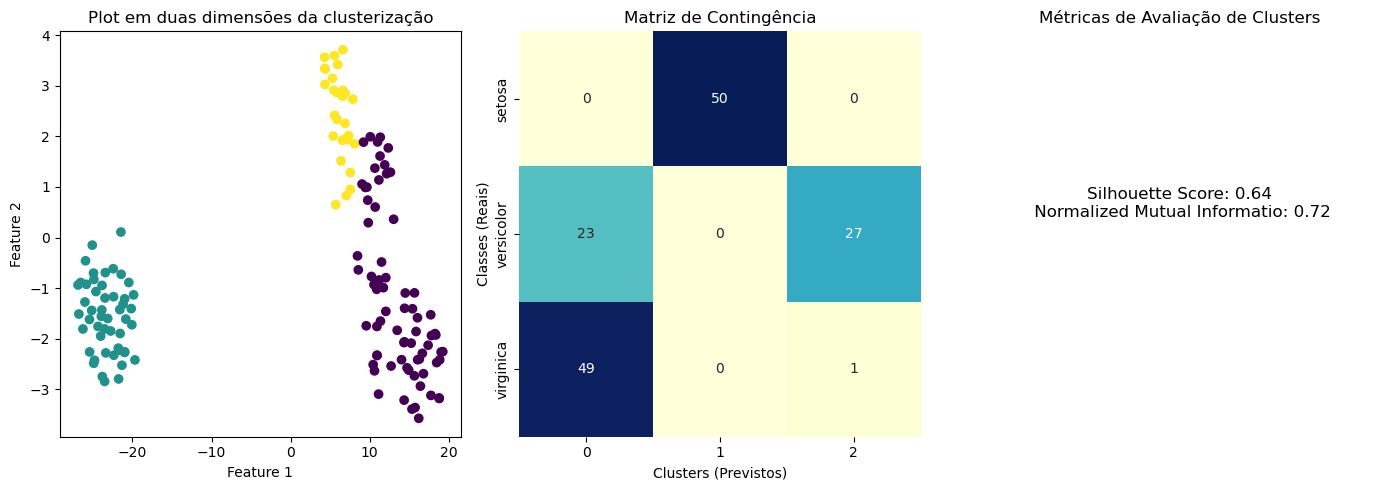

In [10]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, ac_labels_iris, iris_target_names)

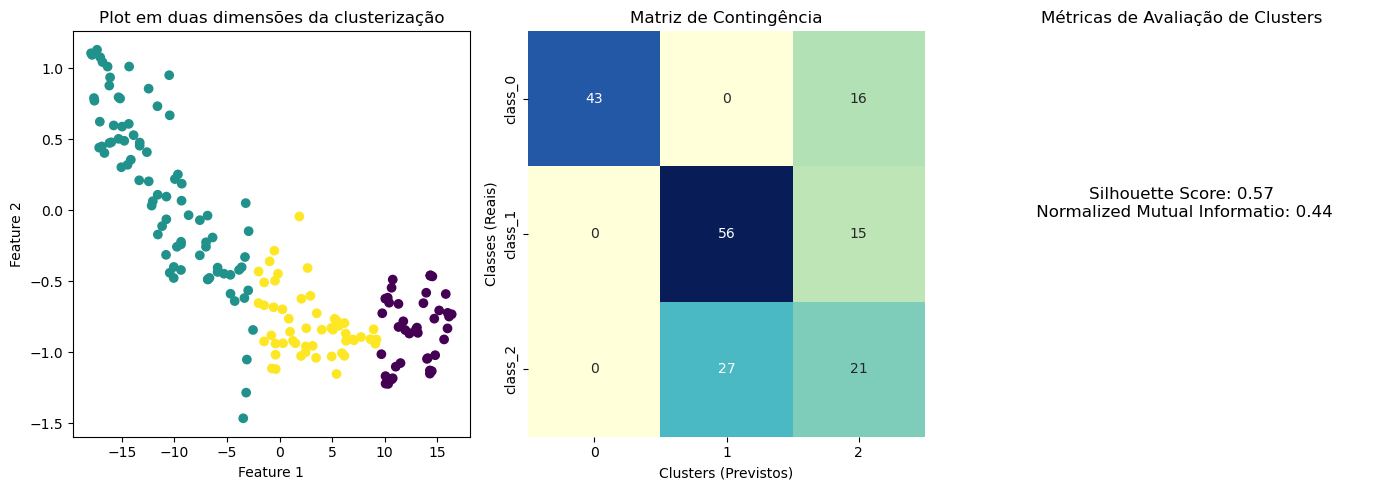

In [11]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, ac_labels_wine, wine_target_names)

<h1>Ligação Média</h1>

In [12]:
ac_labels_syn_ctrl = AgglomerativeClustering(n_clusters = 6, linkage='average').fit_predict(X_syn_ctrl)
ac_labels_wine = AgglomerativeClustering(n_clusters = 3, linkage='average').fit_predict(X_wine)
ac_labels_iris = AgglomerativeClustering(n_clusters = 3, linkage='average').fit_predict(X_iris)

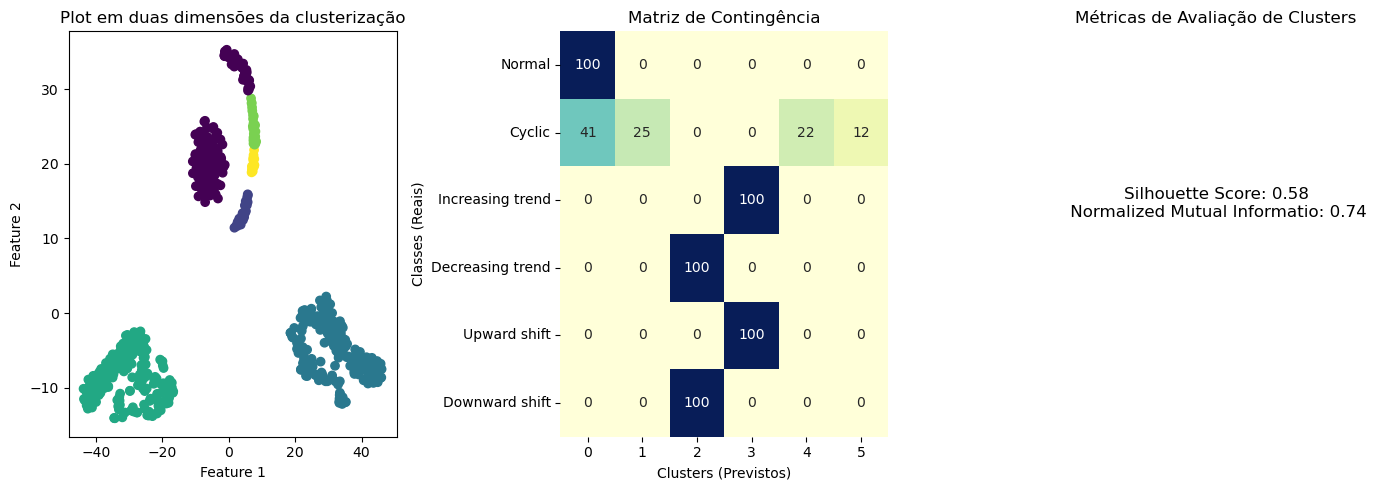

In [13]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, ac_labels_syn_ctrl, syn_ctrl_target_names)

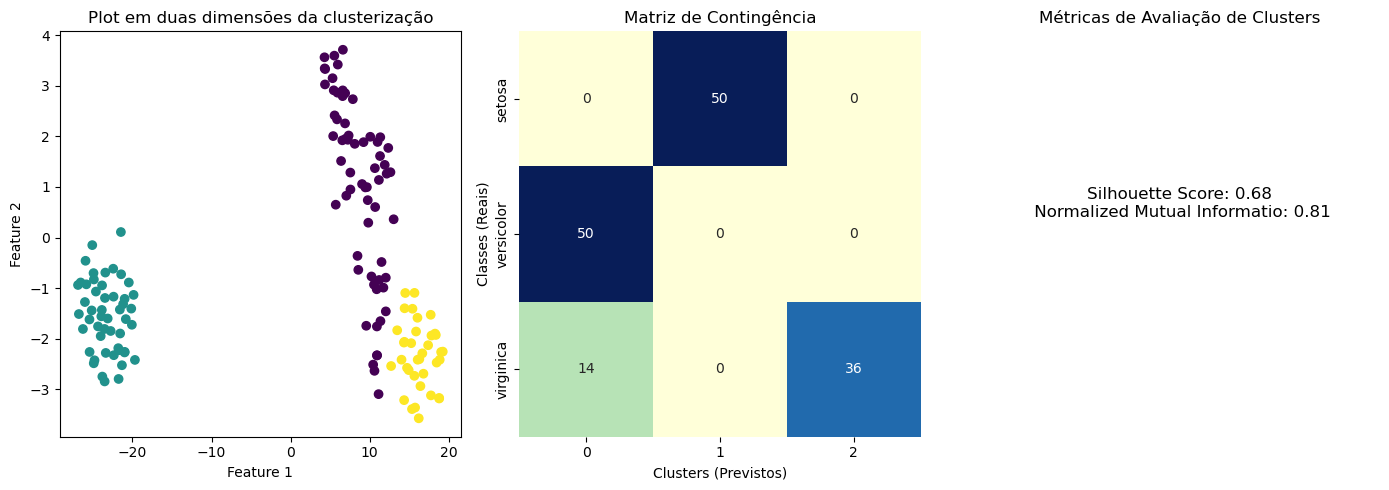

In [14]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, ac_labels_iris, iris_target_names)

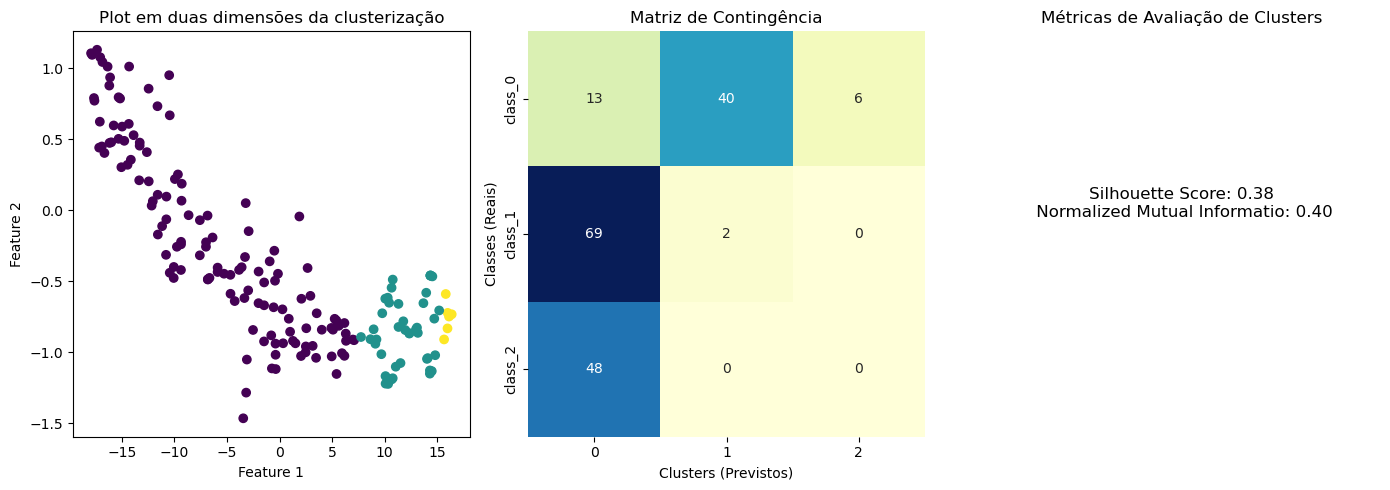

In [15]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, ac_labels_wine, wine_target_names)

<h1>Ligação Ward</h1>

In [16]:
ac_labels_syn_ctrl = AgglomerativeClustering(n_clusters = 6, linkage='ward').fit_predict(X_syn_ctrl)
ac_labels_wine = AgglomerativeClustering(n_clusters = 3, linkage='ward').fit_predict(X_wine)
ac_labels_iris = AgglomerativeClustering(n_clusters = 3, linkage='ward').fit_predict(X_iris)

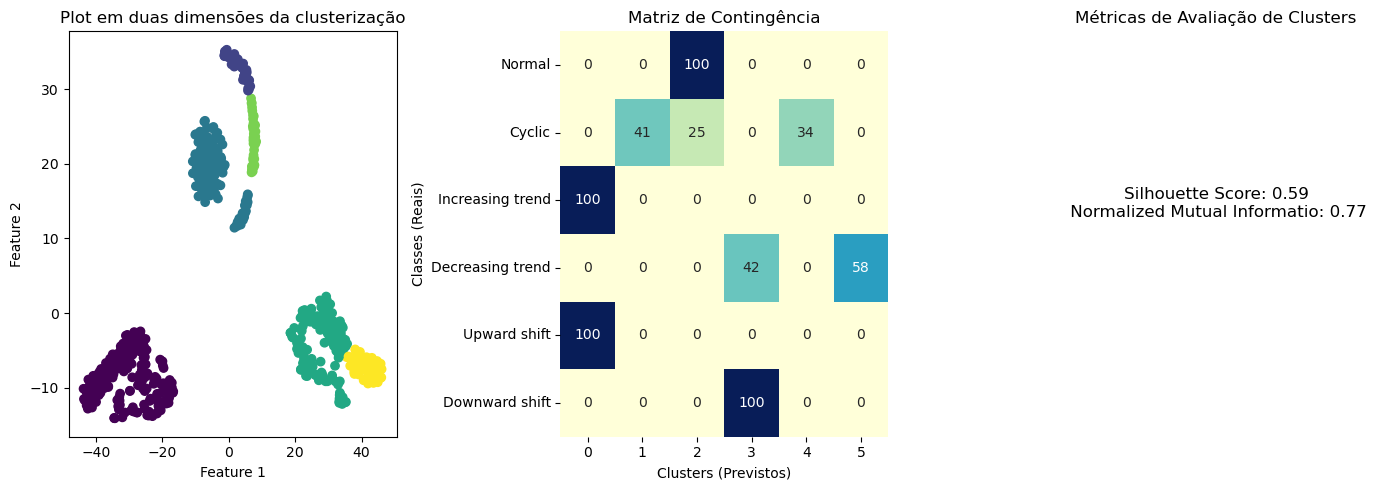

In [17]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, ac_labels_syn_ctrl, syn_ctrl_target_names)

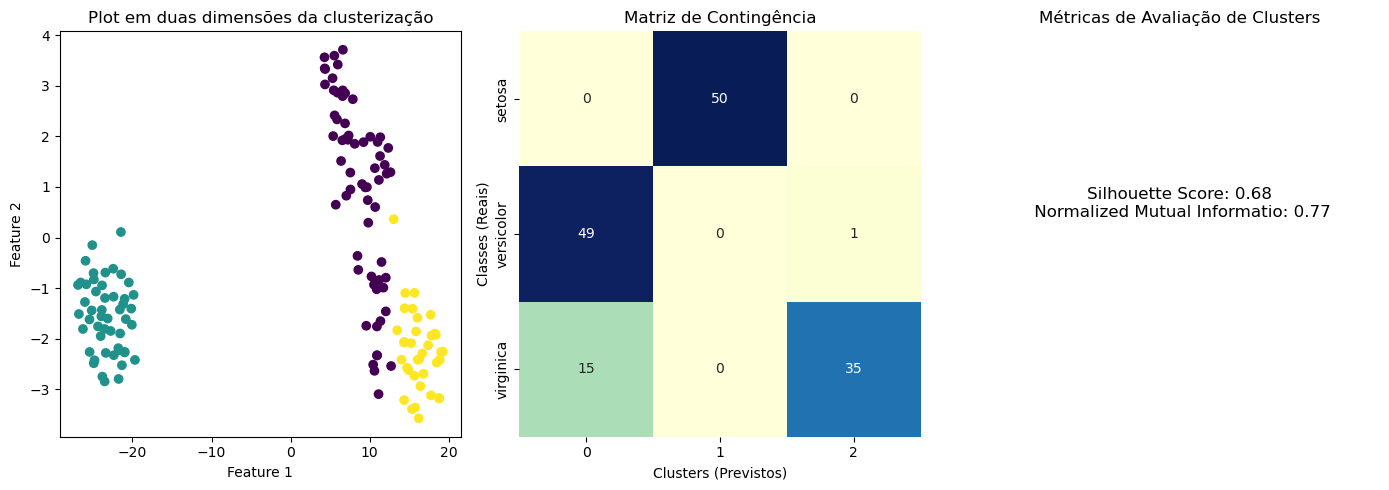

In [18]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, ac_labels_iris, iris_target_names)

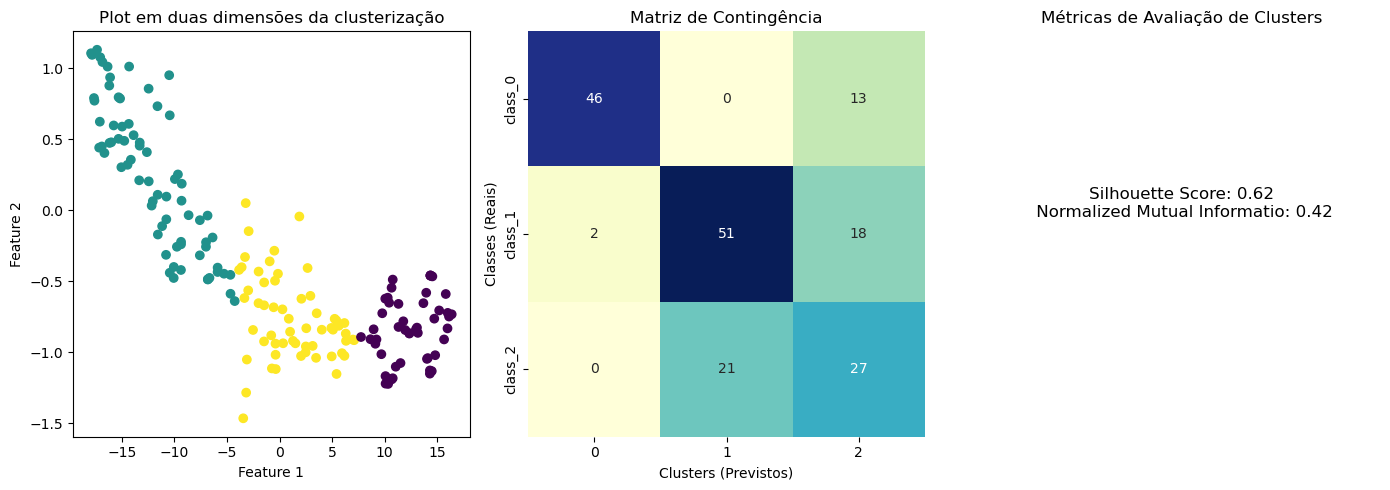

In [19]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, ac_labels_wine, wine_target_names)